### Step 1: Import Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset

In [55]:
data_path = 'smartphones.csv'
smartphones = pd.read_csv(data_path)

smartphones.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


### Step 3: Dataset Exploration

In [56]:
smartphones.shape

(1816, 8)

In [57]:
dataset_info = smartphones.info()

descriptive_statistics = smartphones.describe()

dataset_info, descriptive_statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


(None,
               RAM      Storage  Final Price
 count  1333.00000  1791.000000  1816.000000
 mean      5.96099   162.652150   492.175573
 std       2.66807   139.411605   398.606183
 min       1.00000     2.000000    60.460000
 25%       4.00000    64.000000   200.990000
 50%       6.00000   128.000000   349.990000
 75%       8.00000   256.000000   652.717500
 max      12.00000  1000.000000  2271.280000)

### Step 4: Data Cleaning and Validation

In [58]:
smartphones[smartphones.isna().any(axis=1)].head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
16,Apple iPhone 14 128GB Medianoche Libre,Apple,iPhone 14,NaN,128.0,Black,Yes,1009.0
25,Apple iPhone 14 Pro Max 256GB Negro Espacial L...,Apple,iPhone 14,NaN,256.0,Black,Yes,1599.0
31,Apple iPhone 14 Pro Max 128GB Negro Espacial L...,Apple,iPhone 14,NaN,128.0,Black,Yes,1469.0
39,Apple iPhone 14 Pro Max 128GB Oro Libre,Apple,iPhone 14,NaN,128.0,Gold,Yes,1469.0
88,Apple iPhone 14 Pro 128GB Negro Espacial Libre,Apple,iPhone 14,NaN,128.0,Black,Yes,1319.0


In [59]:
# Calculate the median for RAM and Storage by Brand
brand_medians = smartphones.groupby('Brand').agg({'RAM': 'median', 'Storage': 'median'})

brand_medians.head()

,RAM,Storage
Brand,,
Alcatel,2.0,32.0
Apple,NaN,256.0
Asus,8.0,256.0
BQ,NaN,2.0
Blackview,4.0,64.0


In [60]:
# Filling missing values with the brand-specific medians for RAM and Storage
for brand in brand_medians.index:
    smartphones.loc[smartphones['Brand'] == brand, 'RAM'] = smartphones.loc[smartphones['Brand'] == brand, 'RAM'].fillna(brand_medians.loc[brand, 'RAM'])
    smartphones.loc[smartphones['Brand'] == brand, 'Storage'] = smartphones.loc[smartphones['Brand'] == brand, 'Storage'].fillna(brand_medians.loc[brand, 'Storage'])

# Verify the changes by checking if there are any more missing values in 'RAM' and 'Storage'
smartphones[['RAM', 'Storage']].isnull().sum()

RAM        296
Storage      0
dtype: int64

```python
for brand in brand_medians.index:
```
   This line starts a loop that iterates over each brand present in the `brand_medians` DataFrame. The `brand_medians.index` contains the list of all brands for which we have calculated the median values for `RAM` and `Storage`.

```python
smartphones.loc[smartphones['Brand'] == brand, 'RAM']
```
   Inside the loop, for each brand, this line uses the `.loc[]` accessor to locate all rows in the `smartphones` DataFrame where the `Brand` column matches the current brand in the loop. It specifically targets the `RAM` column of these rows. This allows the operation to be performed only on the subset of the DataFrame that pertains to the current brand.

```python
= smartphones.loc[smartphones['Brand'] == brand, 'RAM'].fillna(brand_medians.loc[brand, 'RAM'])
```
   The `fillna()` function is used to fill the missing (`NaN`) values in the `RAM` column for the current brand. The value used to fill the missing data is the median RAM for the respective brand, which is accessed using `brand_medians.loc[brand, 'RAM']`. This median value is specific to each brand and was calculated and stored in the `brand_medians` DataFrame earlier.

In [61]:
ram_median = smartphones['RAM'].median()

smartphones['RAM'].fillna(ram_median, inplace=True)

duplicate_rows = smartphones.duplicated().sum()
unique_free_values = smartphones['Free'].unique()

ram_median, duplicate_rows, unique_free_values

(6.0, 0, array(['Yes', 'No'], dtype=object))

In [62]:
brand_medians = smartphones.groupby('Brand').agg({'RAM': 'median', 'Storage': 'median'})

brand_medians.head()

,RAM,Storage
Brand,,
Alcatel,2.0,32.0
Apple,6.0,256.0
Asus,8.0,256.0
BQ,6.0,2.0
Blackview,4.0,64.0


### Step 5: Data Transformation and Feature Engineering

In [64]:
price_bins = [0, 200, 500, 1000, np.inf]
price_labels = ['Budget', 'Mid-Range', 'Premium', 'Luxury']
smartphones['Price Category'] = pd.cut(smartphones['Final Price'], bins=price_bins, labels=price_labels)

smartphones.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price,Price Category
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60,Mid-Range
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00,Mid-Range
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01,Budget
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99,Mid-Range
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00,Premium


This code snippet is used to categorize or classify the `Final Price` of smartphones into different price ranges using the `pd.cut()` function from pandas. Here's what each part does:

```python
price_bins = [0, 200, 500, 1000, np.inf]
   ```
This line defines the boundaries of the bins into which the values will be categorized. The bins here represent ranges of prices:
   - \(0 <= Price < 200\): Budget
   - \(200 <= Price < 500\): Mid-Range
   - \(500 <= Price < 1000\): Premium
   - \(1000 <= Price <= Infinity): Luxury

```python
price_labels = ['Budget', 'Mid-Range', 'Premium', 'Luxury']
```
This line defines a list of label names that correspond to each price range defined in `price_bins`. Each label will be applied to the respective bin.

```python
smartphones['Price Category'] = pd.cut(smartphones['Final Price'], bins=price_bins, labels=price_labels)
```
This line uses `pd.cut()` to segment and sort the `Final Price` values into bins. The function maps each price to a category based on the bin it falls into:
   - `bins=price_bins` tells `pd.cut()` what the boundaries of the bins are.
   - `labels=price_labels` assigns a label to each bin. Each value is then labeled according to which bin it falls into.

The result is stored in a new column in the `smartphones` DataFrame called `Price Category`. This column contains the categorical data derived from the `Final Price` according to the specified bins and labels.

### Step 6: Data Visualization

Text(0.5, 1.0, 'Storage vs Final Price')

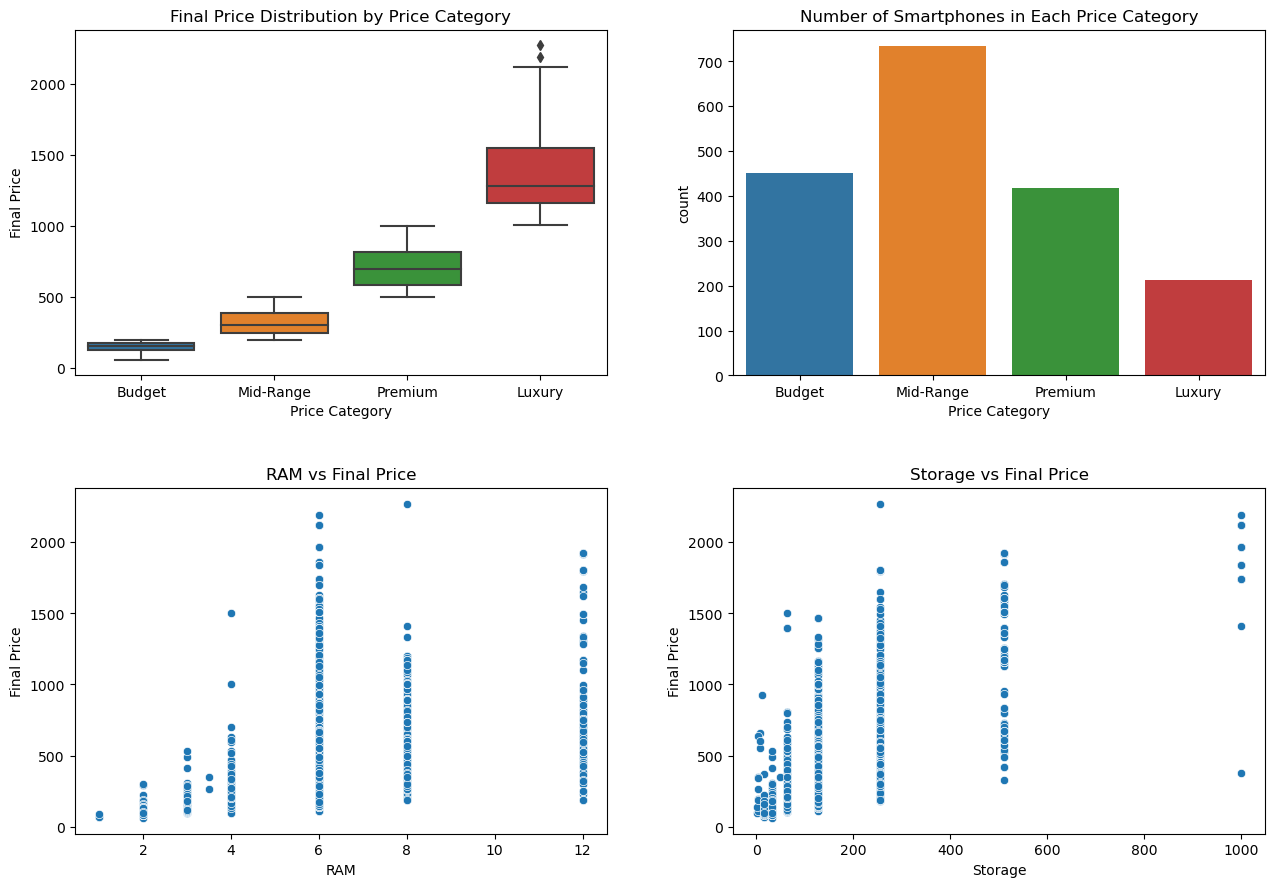

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.tight_layout(pad=6.0)

# Boxplot of Final Price by Price Category
sns.boxplot(ax=axes[0, 0], x='Price Category', y='Final Price', data=smartphones)
axes[0, 0].set_title('Final Price Distribution by Price Category')

# Count plot of Smartphones in each Price Category
sns.countplot(ax=axes[0, 1], x='Price Category', data=smartphones)
axes[0, 1].set_title('Number of Smartphones in Each Price Category')

# Scatter plot of RAM vs Final Price
sns.scatterplot(ax=axes[1, 0], x='RAM', y='Final Price', data=smartphones)
axes[1, 0].set_title('RAM vs Final Price')

# Scatter plot of Storage vs Final Price
sns.scatterplot(ax=axes[1, 1], x='Storage', y='Final Price', data=smartphones)
axes[1, 1].set_title('Storage vs Final Price')

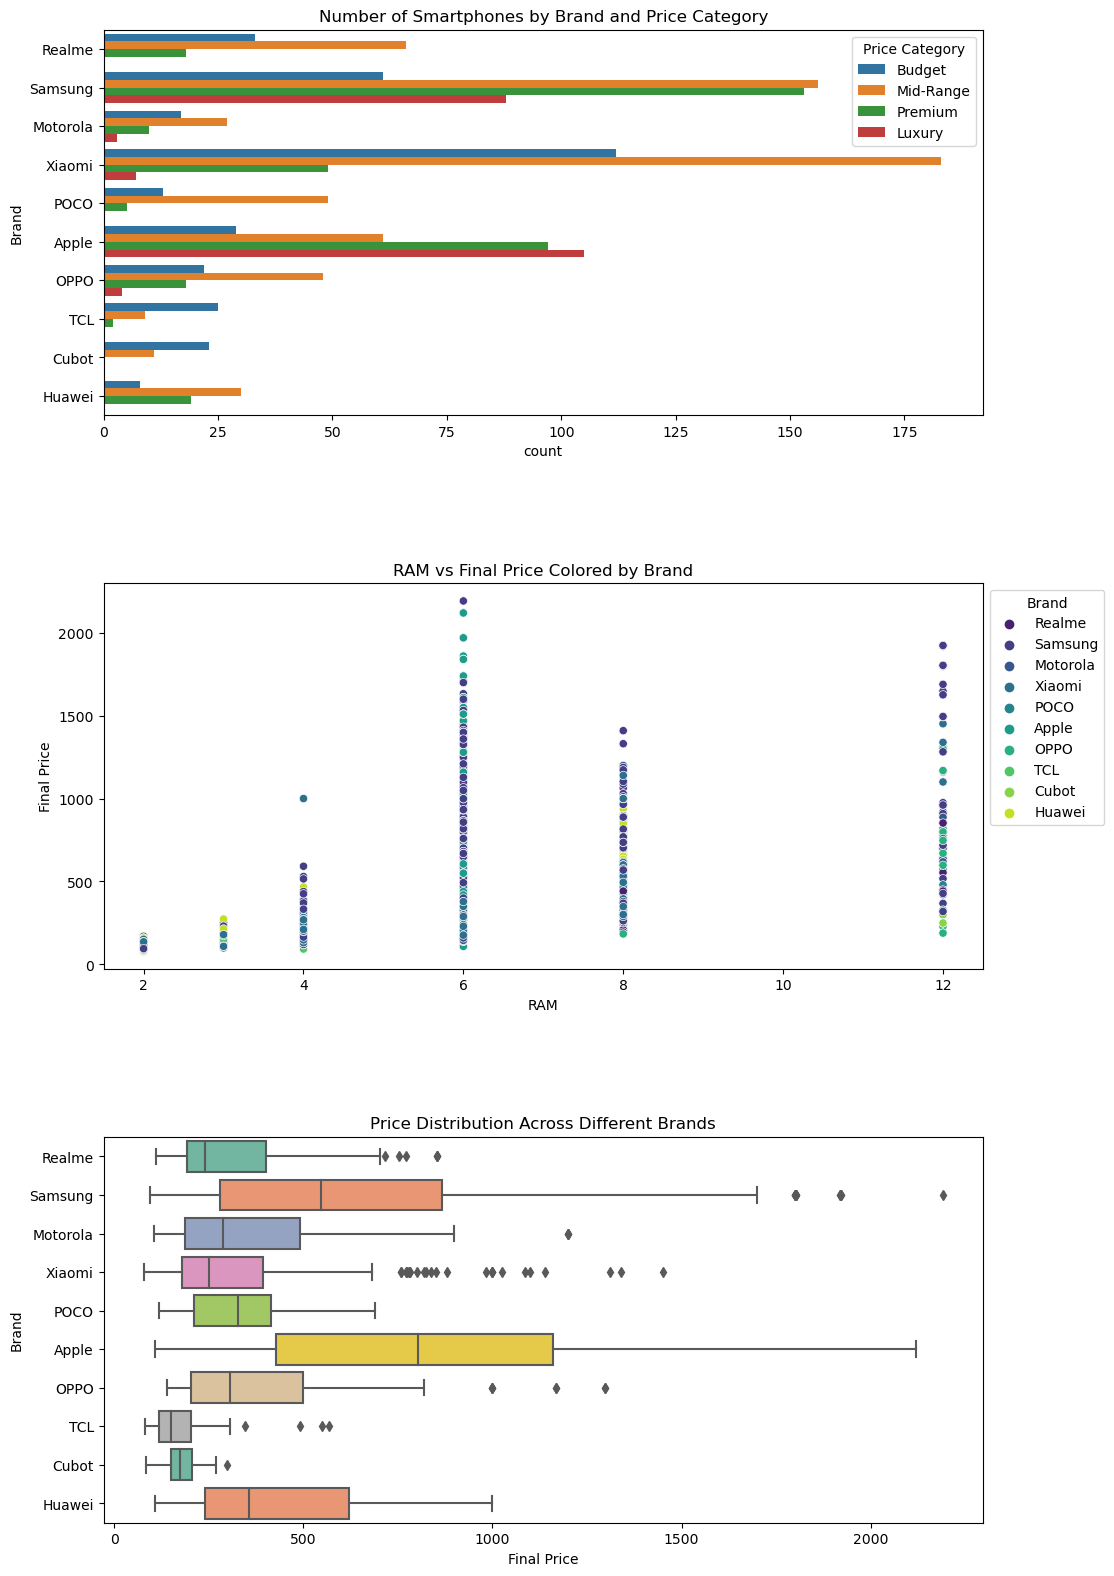

In [53]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))
fig.tight_layout(pad=10.0)

# Visualization 1: Price Category Breakdown with Brand Information
top_brands = smartphones['Brand'].value_counts().nlargest(10).index
filtered_data = smartphones[smartphones['Brand'].isin(top_brands)]
sns.countplot(ax=axes[0], y='Brand', hue='Price Category', data=filtered_data)
axes[0].set_title('Number of Smartphones by Brand and Price Category')
axes[0].legend(title='Price Category')

# Visualization 2: RAM and Storage Impact on Price with Brand as color
sns.scatterplot(ax=axes[1], x='RAM', y='Final Price', hue='Brand', data=filtered_data, palette='viridis')
axes[1].set_title('RAM vs Final Price Colored by Brand')
axes[1].legend(title='Brand', loc='upper left', bbox_to_anchor=(1, 1))

# Visualization 3: Price Distribution Across Different Brands
sns.boxplot(ax=axes[2], x='Final Price', y='Brand', data=filtered_data, palette='Set2')
axes[2].set_title('Price Distribution Across Different Brands')
